# Práctico 6: Clasificación de imágenes usando CNN

Vinculamos con google drive para acceder al dataset.zip:

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Descomprimimos el dataset:

In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/dataset.zip"

Se configura un generador de datos de imágenes para aplicar algunas transformaciones a las imágenes existentes para crear nuevas imágenes de entrenamiento y, a su vez, aumentar la variabilidad de los datos disponibles para el modelo de aprendizaje.

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/dataset/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')  #Se genera conjunto de entrenamiento
test_set = test_datagen.flow_from_directory('/content/dataset/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')        #Se genera conjunto de test.

Found 170 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Modelo de predicción:

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64,
                                                      interpolation='bilinear'),
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu',
                         input_shape=(64, 64, 3)),
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=.25),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Entrenamos el modelo en el conjunto de entrenamiento

In [32]:
model.fit(training_set,
          epochs = 25)

Epoch 1/25
6/6 [==============================] - 1s 220ms/step - loss: 0.0643 - accuracy: 0.9941
Epoch 2/25
6/6 [==============================] - 2s 275ms/step - loss: 0.0579 - accuracy: 0.9941
Epoch 3/25
6/6 [==============================] - 2s 333ms/step - loss: 0.0450 - accuracy: 0.9941
Epoch 4/25
6/6 [==============================] - 1s 209ms/step - loss: 0.0581 - accuracy: 0.9882
Epoch 5/25
6/6 [==============================] - 1s 224ms/step - loss: 0.0503 - accuracy: 0.9941
Epoch 6/25
6/6 [==============================] - 1s 233ms/step - loss: 0.0580 - accuracy: 0.9882
Epoch 7/25
6/6 [==============================] - 1s 225ms/step - loss: 0.0558 - accuracy: 0.9882
Epoch 8/25
6/6 [==============================] - 1s 220ms/step - loss: 0.0457 - accuracy: 0.9941
Epoch 9/25
6/6 [==============================] - 2s 340ms/step - loss: 0.0512 - accuracy: 0.9882
Epoch 10/25
6/6 [==============================] - 2s 272ms/step - loss: 0.0499 - accuracy: 0.9941
Epoch 11/25
6/6 [==

Se evalua el modelo en el conjunto de test

In [33]:
model.evaluate(test_set)

1/1 [==============================] - 0s 322ms/step - loss: 0.8378 - accuracy: 0.7333


[0.8378239274024963, 0.7333333492279053]

Se evalua sobre algunas imagenes de test individuales

In [46]:
import numpy as np
b = test_set.next()
print(b[1][0:5])
model.predict(b[0][0:5])

[1. 1. 0. 0. 0.]
1/1 [==============================] - 0s 22ms/step


array([[5.7194190e-04, 9.9942797e-01],
       [3.0630123e-02, 9.6936989e-01],
       [9.9513382e-01, 4.8661800e-03],
       [9.7380030e-01, 2.6199676e-02],
       [1.7058855e-02, 9.8294109e-01]], dtype=float32)

Pruebas con imagenes nuevas y visualizamos las mismas:

Found 4 images belonging to 2 classes.
[1. 1. 0. 0.]
1/1 [==============================] - 0s 26ms/step
[[4.7271769e-04 9.9952734e-01]
 [7.2991365e-04 9.9927014e-01]
 [9.6749163e-01 3.2508403e-02]
 [9.9361902e-01 6.3809399e-03]]


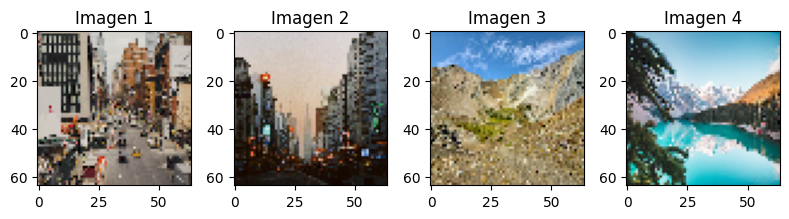

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as img

test_set_prueba = test_datagen.flow_from_directory('/content/dataset/prueba', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

test = test_set_prueba.next()
print(test[1][0:4])
print(model.predict(test[0][0:4]))

x = np.array(test[0][0])
y = np.array(test[0][1])
z = np.array(test[0][2])
s = np.array(test[0][3])

fig, axs = plt.subplots(1, 4,figsize=(8, 4))

axs[0].imshow(x)
axs[1].imshow(y)
axs[2].imshow(z)
axs[3].imshow(s)

axs[0].set_title('Imagen 1')
axs[1].set_title('Imagen 2')
axs[2].set_title('Imagen 3')
axs[3].set_title('Imagen 4')

plt.tight_layout()
plt.show()
